# Title: Predicting Fire Extinguishing Success with Sound Wave Technology

## Problem Statment :

### To develop a cutting-edge fire extinguisher that leverages sound waves as the primary mechanism for extinguishing fires. The motivation behind this innovation is to create a fire suppression device that is exceptionally safe, reliable, and can effectively combat various fire scenarios. Prior to its release, it is crucial to assess and predict the performance of the sound wave-based fire extinguisher across different types of fires to ensure its widespread trust and adoption by the public.

## Objectives:

### 1)Develop a classification model using machine learning techniques.
### 2)Explore the impact of different features on the success of fire extinguishing.
### 3)Evaluate and compare the performance of multiple classification algorithms.
### 4)Understand the suitability of sound wave technology in diverse fire scenarios.

# Random Forest Model

### Loading the Libraries 

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # For classification
from sklearn.metrics import mean_squared_error  # For regression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

C:\Users\aniru\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_excel("C:\\Users\\aniru\\OneDrive\\Desktop\\ML-2 EndTerm\\Acoustic_Extinguisher_Fire_Dataset.xlsx")

In [3]:
data

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


### Convert categorical variables to numerical using one-hot encoding

In [4]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['FUEL'])

In [5]:
data

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1,10,96,0.0,75,0,1,0,0,0
1,1,10,96,0.0,72,1,1,0,0,0
2,1,10,96,2.6,70,1,1,0,0,0
3,1,10,96,3.2,68,1,1,0,0,0
4,1,10,109,4.5,67,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17437,7,190,86,2.2,5,0,0,0,1,0
17438,7,190,84,2.0,4,0,0,0,1,0
17439,7,190,80,1.5,3,0,0,0,1,0
17440,7,190,76,0.4,2,0,0,0,1,0


### Checking the Missing Values

In [6]:
# Check for missing values
print(data.isnull().sum())

SIZE             0
DISTANCE         0
DESIBEL          0
AIRFLOW          0
FREQUENCY        0
STATUS           0
FUEL_gasoline    0
FUEL_kerosene    0
FUEL_lpg         0
FUEL_thinner     0
dtype: int64


### Seperating the X_custom and target variable y_custom

In [7]:
# Separate features (X_custom) and target variable (y_custom)
X_custom = data.drop('STATUS', axis='columns')
y_custom = data['STATUS']

### Split to training and testing 

In [8]:
# Split the dataset into training and testing sets
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_custom, y_custom, test_size=0.2)

### Create a Random Forest classifier

In [9]:
# Create a Random Forest classifier
model_custom_rf = RandomForestClassifier(n_estimators=20)

In [10]:
# Train the model
model_custom_rf.fit(X_train_custom, y_train_custom)

RandomForestClassifier(n_estimators=20)

In [11]:
# Make predictions on the test set
y_predicted_custom_rf = model_custom_rf.predict(X_test_custom)

In [12]:
# Evaluate the model
accuracy_custom_rf = accuracy_score(y_test_custom, y_predicted_custom_rf)
precision_custom_rf = precision_score(y_test_custom, y_predicted_custom_rf, average='weighted')
recall_custom_rf = recall_score(y_test_custom, y_predicted_custom_rf, average='weighted')
f1_custom_rf = f1_score(y_test_custom, y_predicted_custom_rf, average='weighted')

# Print the evaluation metrics
print(f"Accuracy on the test set (Random Forest): {accuracy_custom_rf}")
print(f"Precision on the test set (Random Forest): {precision_custom_rf}")
print(f"Recall on the test set (Random Forest): {recall_custom_rf}")
print(f"F1 score on the test set (Random Forest): {f1_custom_rf}")

Accuracy on the test set (Random Forest): 0.9670392662654056
Precision on the test set (Random Forest): 0.9670725831507099
Recall on the test set (Random Forest): 0.9670392662654056
F1 score on the test set (Random Forest): 0.9670380477260625


In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
# Create a confusion matrix
cm_custom = confusion_matrix(y_test_custom, y_predicted_custom_rf)
print("Confusion Matrix:")
print(cm_custom)

Confusion Matrix:
[[1702   50]
 [  65 1672]]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

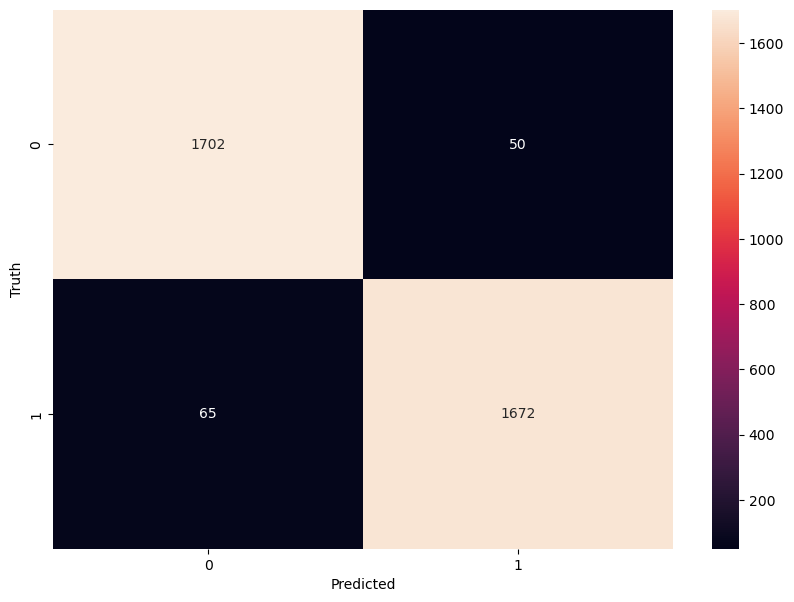

In [16]:
# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_custom, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## XG Boost 

In [17]:
from xgboost import XGBClassifier  # Import XGBClassifier from xgboost

In [18]:
data

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1,10,96,0.0,75,0,1,0,0,0
1,1,10,96,0.0,72,1,1,0,0,0
2,1,10,96,2.6,70,1,1,0,0,0
3,1,10,96,3.2,68,1,1,0,0,0
4,1,10,109,4.5,67,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17437,7,190,86,2.2,5,0,0,0,1,0
17438,7,190,84,2.0,4,0,0,0,1,0
17439,7,190,80,1.5,3,0,0,0,1,0
17440,7,190,76,0.4,2,0,0,0,1,0


In [19]:
# Create an XGBoost classifier
model_custom_xgb = XGBClassifier(n_estimators=20)

In [20]:
# Train the model
model_custom_xgb.fit(X_train_custom, y_train_custom)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [21]:
# Make predictions on the test set
y_predicted_custom_xgb = model_custom_xgb.predict(X_test_custom)

In [22]:
# Evaluate the model
accuracy_custom_xgb = accuracy_score(y_test_custom, y_predicted_custom_xgb)
precision_custom_xgb = precision_score(y_test_custom, y_predicted_custom_xgb, average='weighted')
recall_custom_xgb = recall_score(y_test_custom, y_predicted_custom_xgb, average='weighted')
f1_custom_xgb = f1_score(y_test_custom, y_predicted_custom_xgb, average='weighted')

# Print the evaluation metrics
print(f"Accuracy on the test set (XGBoost): {accuracy_custom_xgb}")
print(f"Precision on the test set (XGBoost): {precision_custom_xgb}")
print(f"Recall on the test set (XGBoost): {recall_custom_xgb}")
print(f"F1 score on the test set (XGBoost): {f1_custom_xgb}")

Accuracy on the test set (XGBoost): 0.9610203496703926
Precision on the test set (XGBoost): 0.9610487007335357
Recall on the test set (XGBoost): 0.9610203496703926
F1 score on the test set (XGBoost): 0.9610190495246488


In [23]:
# Create a confusion matrix
cm_custom_xgb = confusion_matrix(y_test_custom, y_predicted_custom_xgb)
print("Confusion Matrix (XGBoost):")
print(cm_custom_xgb)

Confusion Matrix (XGBoost):
[[1691   61]
 [  75 1662]]


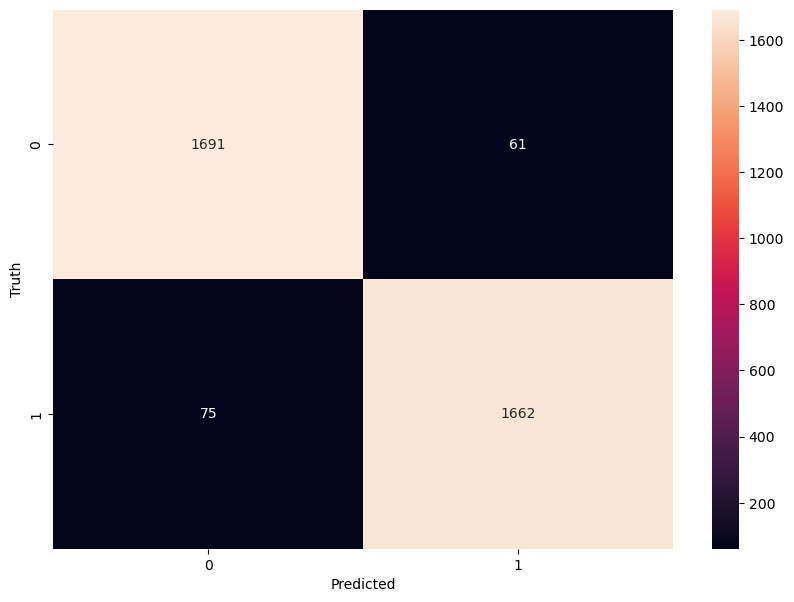

In [24]:
# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_custom_xgb, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Ada Boost

### Calling Libraries for Ada Boost

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
data

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1,10,96,0.0,75,0,1,0,0,0
1,1,10,96,0.0,72,1,1,0,0,0
2,1,10,96,2.6,70,1,1,0,0,0
3,1,10,96,3.2,68,1,1,0,0,0
4,1,10,109,4.5,67,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17437,7,190,86,2.2,5,0,0,0,1,0
17438,7,190,84,2.0,4,0,0,0,1,0
17439,7,190,80,1.5,3,0,0,0,1,0
17440,7,190,76,0.4,2,0,0,0,1,0


In [27]:
# Create an AdaBoost classifier
model_custom_adaboost = AdaBoostClassifier(n_estimators=20)

In [28]:
# Train the model
model_custom_adaboost.fit(X_train_custom, y_train_custom)

AdaBoostClassifier(n_estimators=20)

In [29]:
# Make predictions on the test set
y_predicted_custom_adaboost = model_custom_adaboost.predict(X_test_custom)

In [30]:
# Evaluate the model
accuracy_custom_adaboost = accuracy_score(y_test_custom, y_predicted_custom_adaboost)
precision_custom_adaboost = precision_score(y_test_custom, y_predicted_custom_adaboost, average='weighted')
recall_custom_adaboost = recall_score(y_test_custom, y_predicted_custom_adaboost, average='weighted')
f1_custom_adaboost = f1_score(y_test_custom, y_predicted_custom_adaboost, average='weighted')

# Print the evaluation metrics
print(f"Accuracy on the test set (AdaBoost): {accuracy_custom_adaboost}")
print(f"Precision on the test set (AdaBoost): {precision_custom_adaboost}")
print(f"Recall on the test set (AdaBoost): {recall_custom_adaboost}")
print(f"F1 score on the test set (AdaBoost): {f1_custom_adaboost}")

Accuracy on the test set (AdaBoost): 0.9217540842648323
Precision on the test set (AdaBoost): 0.922077718377492
Recall on the test set (AdaBoost): 0.9217540842648323
F1 score on the test set (AdaBoost): 0.9217339200206348


In [31]:
# Create a confusion matrix
cm_custom_adaboost = confusion_matrix(y_test_custom, y_predicted_custom_adaboost)
print("Confusion Matrix (AdaBoost):")
print(cm_custom_adaboost)

Confusion Matrix (AdaBoost):
[[1640  112]
 [ 161 1576]]


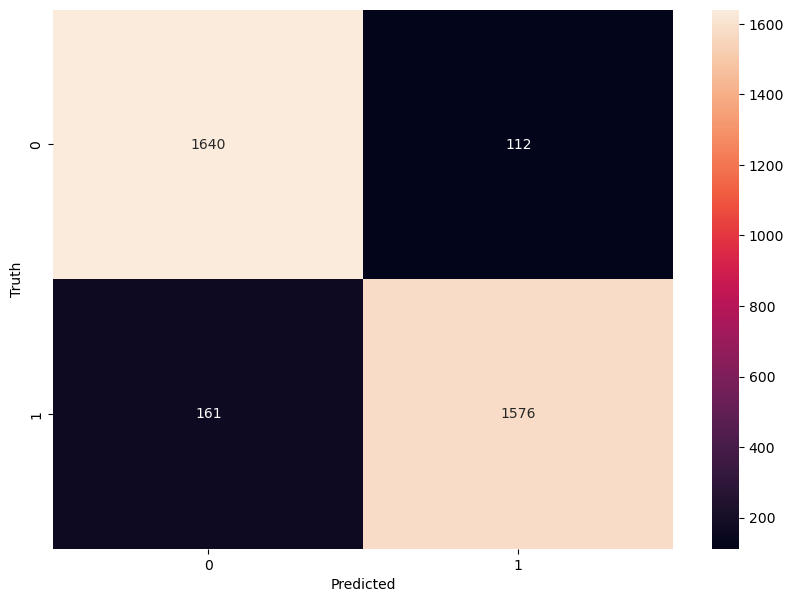

In [32]:
# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_custom_adaboost, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Gradient Boost 

## calling Libraries 

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
data

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1,10,96,0.0,75,0,1,0,0,0
1,1,10,96,0.0,72,1,1,0,0,0
2,1,10,96,2.6,70,1,1,0,0,0
3,1,10,96,3.2,68,1,1,0,0,0
4,1,10,109,4.5,67,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17437,7,190,86,2.2,5,0,0,0,1,0
17438,7,190,84,2.0,4,0,0,0,1,0
17439,7,190,80,1.5,3,0,0,0,1,0
17440,7,190,76,0.4,2,0,0,0,1,0


In [35]:
# Create a Gradient Boosting classifier
model_custom_gradient_boost = GradientBoostingClassifier(n_estimators=20)

In [36]:
# Train the model
model_custom_gradient_boost.fit(X_train_custom, y_train_custom)

GradientBoostingClassifier(n_estimators=20)

In [37]:
# Make predictions on the test set
y_predicted_custom_gradient_boost = model_custom_gradient_boost.predict(X_test_custom)

In [38]:
# Evaluate the model
accuracy_custom_gradient_boost = accuracy_score(y_test_custom, y_predicted_custom_gradient_boost)
precision_custom_gradient_boost = precision_score(y_test_custom, y_predicted_custom_gradient_boost, average='weighted')
recall_custom_gradient_boost = recall_score(y_test_custom, y_predicted_custom_gradient_boost, average='weighted')
f1_custom_gradient_boost = f1_score(y_test_custom, y_predicted_custom_gradient_boost, average='weighted')

In [39]:
# Print the evaluation metrics
print(f"Accuracy on the test set (Gradient Boosting): {accuracy_custom_gradient_boost}")
print(f"Precision on the test set (Gradient Boosting): {precision_custom_gradient_boost}")
print(f"Recall on the test set (Gradient Boosting): {recall_custom_gradient_boost}")
print(f"F1 Score on the test set (Gradient Boosting): {f1_custom_gradient_boost}")

Accuracy on the test set (Gradient Boosting): 0.8905130409859559
Precision on the test set (Gradient Boosting): 0.8909594710717396
Recall on the test set (Gradient Boosting): 0.8905130409859559
F1 Score on the test set (Gradient Boosting): 0.8904725485694749


In [40]:
# Create a confusion matrix
cm_custom_gradient_boost = confusion_matrix(y_test_custom, y_predicted_custom_gradient_boost)
print("Confusion Matrix (Gradient Boosting):")
print(cm_custom_gradient_boost)

Confusion Matrix (Gradient Boosting):
[[1591  161]
 [ 221 1516]]


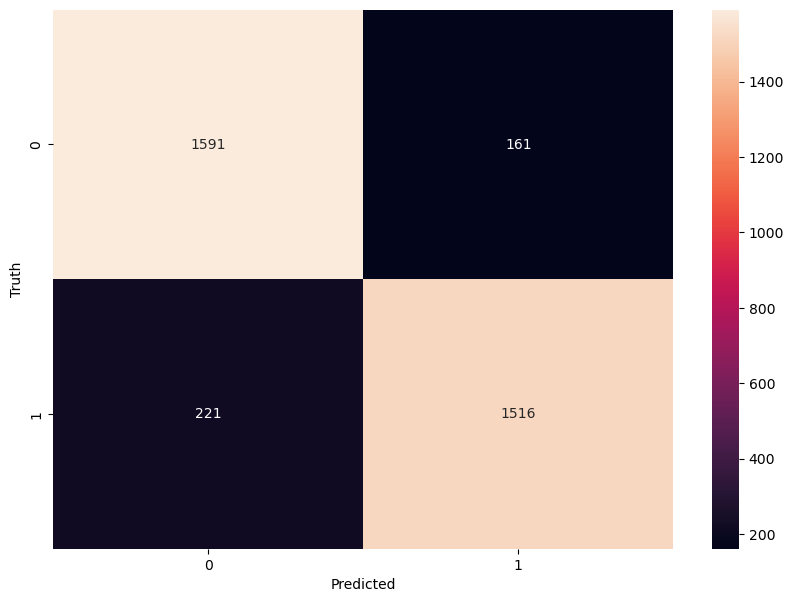

In [41]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_custom_gradient_boost, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [43]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [accuracy_custom_rf, accuracy_custom_adaboost, accuracy_custom_gradient_boost, accuracy_custom_xgb],
    'Precision': [precision_custom_rf, precision_custom_adaboost, precision_custom_gradient_boost, precision_custom_xgb],
    'Recall': [recall_custom_rf, recall_custom_adaboost, recall_custom_gradient_boost, recall_custom_xgb],
    'F1 Score': [f1_custom_rf, f1_custom_adaboost, f1_custom_gradient_boost, f1_custom_xgb]
})

# Display the results
print(results)

               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.967039   0.967073  0.967039  0.967038
1           AdaBoost  0.921754   0.922078  0.921754  0.921734
2  Gradient Boosting  0.890513   0.890959  0.890513  0.890473
3            XGBoost  0.961020   0.961049  0.961020  0.961019


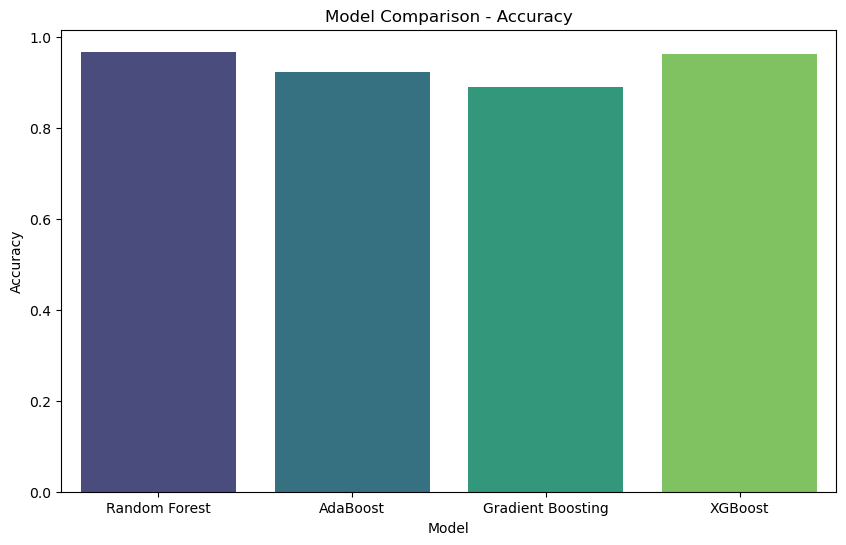

In [44]:
# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.show()

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test_custom, model_custom_rf.predict_proba(X_test_custom)[:, 1])
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test_custom, model_custom_adaboost.predict_proba(X_test_custom)[:, 1])
fpr_gradient_boost, tpr_gradient_boost, _ = roc_curve(y_test_custom, model_custom_gradient_boost.predict_proba(X_test_custom)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_custom, model_custom_xgb.predict_proba(X_test_custom)[:, 1])

# Calculate AUC (Area Under the Curve) for each model
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
roc_auc_gradient_boost = auc(fpr_gradient_boost, tpr_gradient_boost)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

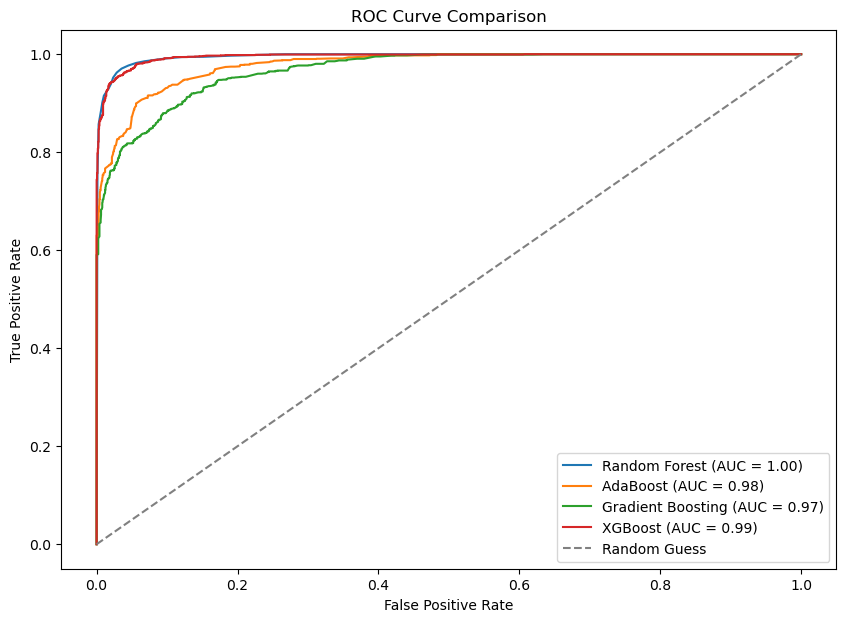

In [46]:
# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.2f})')
plt.plot(fpr_gradient_boost, tpr_gradient_boost, label=f'Gradient Boosting (AUC = {roc_auc_gradient_boost:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

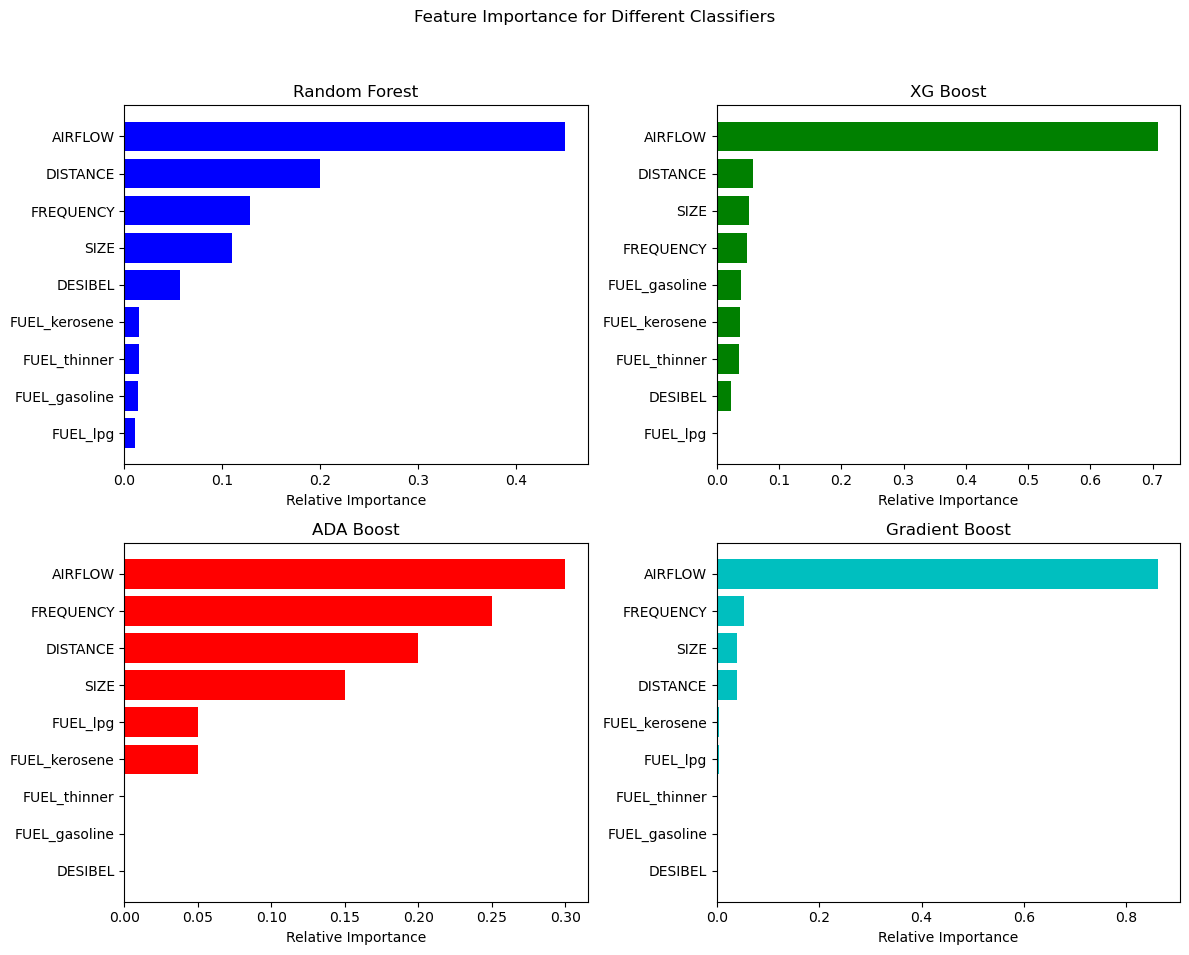

In [47]:
import numpy as np
import matplotlib.pyplot as plt

#  already trained and stored your models as:
# model_custom_rf, model_custom_xgb, model_custom_adaboost, model_custom_gradient_boost

# Extract feature importance for each model
rf_importance = model_custom_rf.feature_importances_
xgb_importance = model_custom_xgb.feature_importances_
ada_importance = model_custom_adaboost.feature_importances_
gb_importance = model_custom_gradient_boost.feature_importances_

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Feature Importance for Different Classifiers')

#  features are stored in X_custom.columns
features = X_custom.columns

# Random Forest
indices_rf = np.argsort(rf_importance)
axes[0, 0].barh(range(len(indices_rf)), rf_importance[indices_rf], color='b', align='center')
axes[0, 0].set_yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
axes[0, 0].set_xlabel('Relative Importance')
axes[0, 0].set_title('Random Forest')

# XGBoost
indices_xgb = np.argsort(xgb_importance)
axes[0, 1].barh(range(len(indices_xgb)), xgb_importance[indices_xgb], color='g', align='center')
axes[0, 1].set_yticks(range(len(indices_xgb)), [features[i] for i in indices_xgb])
axes[0, 1].set_xlabel('Relative Importance')
axes[0, 1].set_title('XG Boost')

# ADA Boost
indices_ada = np.argsort(ada_importance)
axes[1, 0].barh(range(len(indices_ada)), ada_importance[indices_ada], color='r', align='center')
axes[1, 0].set_yticks(range(len(indices_ada)), [features[i] for i in indices_ada])
axes[1, 0].set_xlabel('Relative Importance')
axes[1, 0].set_title('ADA Boost')

# Gradient Boost
indices_gb = np.argsort(gb_importance)
axes[1, 1].barh(range(len(indices_gb)), gb_importance[indices_gb], color='c', align='center')
axes[1, 1].set_yticks(range(len(indices_gb)), [features[i] for i in indices_gb])
axes[1, 1].set_xlabel('Relative Importance')
axes[1, 1].set_title('Gradient Boost')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
